# Loading Data
Data for each of FY is present as a seperate sheet in the same excel file.

## Training Data

In [1]:
import pandas as pd

train_df = pd.DataFrame()
# Data for the different years are stored as seperate sheets in the same excel file.
sheet_names= ['FY10-11', 'FY11-12', 'FY12-13', 'FY13-14', 'FY14-15', 'FY15-16', 'FY16-17', 'FY17-18', 'FY18-19', 'FY19-20', 'FY20-21','FY21-22','FY22-23']

# Loading the Excel files.
for sheet_name in sheet_names:
  df = pd.read_excel('Actual Demand data_FY10-11 to Dec-23.xlsx',
                   sheet_name=sheet_name)
  # Changing the column names.
  df.columns = ['Date', 'Month', 'Time Block', 'Demand'] # Changing the column names.
  train_df = pd.concat([train_df, df]) # Concatenating the years.

train_df

,Date,Month,Time Block,Demand
0,2010-04-01,4,1,1125.851800
1,2010-04-01,4,2,1093.590000
2,2010-04-01,4,3,1062.779600
3,2010-04-01,4,4,1027.584300
4,2010-04-01,4,5,999.537900
...,...,...,...,...
35035,2023-03-31,3,92,1347.293286
35036,2023-03-31,3,93,1340.936102
35037,2023-03-31,3,94,1339.039369
35038,2023-03-31,3,95,1332.054652


The month column is redundant, so lets drop it and then try to merge the time block with the date column.

In [2]:
# Droping the Month Colomn
train_df = train_df.drop('Month', axis=1)

# Adding a column 'Time' with time data with 15 mins interval.
train_df['Time'] = [f"{h:02}:{m:02}" for h in range(24) for m in range(0, 60, 15)] * (len(train_df)//96) # Multiplying for 2 years

# Creating a new column with both Date and Time.
train_df['DateTime'] = train_df['Date'].astype(str) + ' ' + train_df['Time']

# Droping 'Date', 'Time', and 'Time Block' columns.
train_df = train_df.drop(['Date','Time', 'Time Block'], axis=1)

# Setting the 'DateTime' column as index.
train_df.set_index('DateTime', inplace=True)
train_df.index = pd.DatetimeIndex(train_df.index, freq = '15min') # Converting the index to datetime index
train_df.head()

,Demand
DateTime,
2010-04-01 00:00:00,1125.8518
2010-04-01 00:15:00,1093.5900
2010-04-01 00:30:00,1062.7796
2010-04-01 00:45:00,1027.5843
2010-04-01 01:00:00,999.5379


## Test Data

In [3]:
test_df = pd.read_excel('Actual Demand data_FY10-11 to Dec-23.xlsx',
                   sheet_name='FY23-24')
test_df.columns = ['Date', 'Month', 'Time Block', 'Demand'] # Changing the column names.

# Droping the Month Colomn
test_df = test_df.drop('Month', axis=1)

# Adding a column 'Time' with time data with 15 mins interval.
test_df['Time'] = [f"{h:02}:{m:02}" for h in range(24) for m in range(0, 60, 15)] * (len(test_df)//96) # Multiplying for 2 years

# Creating a new column with both Date and Time.
test_df['DateTime'] = test_df['Date'].astype(str) + ' ' + test_df['Time']

# Droping 'Date', 'Time', and 'Time Block' columns.
test_df = test_df.drop(['Date','Time', 'Time Block'], axis=1)

# Setting the 'DateTime' column as index.
test_df.set_index('DateTime', inplace=True)
test_df.index = pd.DatetimeIndex(test_df.index, freq = '15min') # Converting the index to datetime index
test_df.head()

,Demand
DateTime,
2023-04-01 00:00:00,1311.951746
2023-04-01 00:15:00,1292.723031
2023-04-01 00:30:00,1272.618655
2023-04-01 00:45:00,1251.742822
2023-04-01 01:00:00,1230.047525


# Loading Exogenous Variables
The exogenous variable data for different years are stored slightly differently, so we have to load each of them individually.

## Training Data

In [4]:
import pandas as pd
ex_df1 = pd.DataFrame()
df1 = pd.read_excel('Weather Master From FY10-11 to FY18-19.xlsx',
                       sheet_name='FY 10-11')
# This sheet had date and time as the 'WEATHER_DATE', which doesnt match the others. So removing the time.
df1['WEATHER_DATE'] = df1['WEATHER_DATE'].astype('str').str.split(' ').str[0]

df2 = pd.read_excel('Weather Master From FY10-11 to FY18-19.xlsx',
                       sheet_name='FY 11-12')
df2['WEATHER_DATE'] = df2['WEATHER_DATE'].astype('str').str.split(' ').str[0]

ex_df1 = pd.concat([df1, df2]) # Concatenating the two dfs.
ex_df1 = ex_df1.drop(['Block', 'ACT_RAINRATE'], axis =1) # Droping unwanted colomns.
ex_df1.columns = ['Date', 'Temp', 'Humidity'] # Renaming the colomns.
ex_df1


,Date,Temp,Humidity
0,2010-04-01,27.1,79.0
1,2010-04-01,27.1,79.0
2,2010-04-01,27.1,79.0
3,2010-04-01,27.1,78.0
4,2010-04-01,27.0,76.0
...,...,...,...
35131,2012-03-31,27.0,84.0
35132,2012-03-31,27.0,84.0
35133,2012-03-31,27.0,85.0
35134,2012-03-31,27.0,85.0


In [5]:
df1 = pd.read_excel('Weather Master From FY10-11 to FY18-19.xlsx',
                       sheet_name='FY12-13')
df2 = pd.read_excel('Weather Master From FY10-11 to FY18-19.xlsx',
                       sheet_name='FY13-14')
df3 = pd.read_excel('Weather Master From FY10-11 to FY18-19.xlsx',
                       sheet_name='FY14-15 to FY15-16')
df4 = pd.read_excel('Weather Master From FY10-11 to FY18-19.xlsx',
                       sheet_name='FY16-17 to FY18-19')
df4.columns = df3.columns # Renaming the columns.

ex_df2 = pd.concat([df1, df2, df3, df4]) # Concatenating the dfs.
ex_df2 = ex_df2.iloc[:,2:6] # Choosing only the required coloumns.
ex_df2 = ex_df2.drop(ex_df2.columns[1], axis =1) # Droping unwanted colomns.
ex_df2.columns = ['Date', 'Temp', 'Humidity'] # Renaming the colomns.
ex_df2


,Date,Temp,Humidity
0,2012-04-01,27.00,86.00
1,2012-04-01,27.00,86.00
2,2012-04-01,26.00,87.00
3,2012-04-01,26.00,87.00
4,2012-04-01,26.00,87.00
...,...,...,...
105115,2019-03-31,27.14,80.06
105116,2019-03-31,27.06,80.62
105117,2019-03-31,26.98,81.03
105118,2019-03-31,26.92,81.27


In [6]:
ex_df3 = pd.DataFrame()
sheet_names = ['FY19-20','FY20-21', 'FY21-22']
for sheet_name in sheet_names:
  df = pd.read_excel('Weather Master From FY19-20 to Dec-23.xlsx',
                      sheet_name=sheet_name)
  df = df[['Date','ACT_TEMP','ACT_HUMIDITY']] # Choosing only the required coloumns.
  ex_df3 = pd.concat([ex_df3, df]) # Concatenating the dfs.

df = pd.read_excel('Weather Master FY 22-23.xlsx',
                      sheet_name='FY22-23')
df = df[['Date','ACT_TEMP','ACT_HUMIDITY']] # Choosing only the required coloumns.
ex_df3 = pd.concat([ex_df3, df]) # Concatenating the dfs.

ex_df3.columns = ['Date', 'Temp', 'Humidity'] # Renaming the colomns.
ex_df3



,Date,Temp,Humidity
0,2019-04-01,26.71,80.61
1,2019-04-01,26.67,80.52
2,2019-04-01,26.62,80.90
3,2019-04-01,26.58,81.23
4,2019-04-01,26.55,81.53
...,...,...,...
35035,2023-03-31,26.80,71.00
35036,2023-03-31,26.60,72.00
35037,2023-03-31,26.43,72.00
35038,2023-03-31,26.60,72.00


In [7]:
ex_train_df = pd.concat([ex_df1, ex_df2, ex_df3]) # Concatenating the dfs.
ex_train_df['Date'] = ex_train_df['Date'].astype('str').str.split(' ').str[0] # Removing the time from the date.
ex_train_df = ex_train_df.ffill()
ex_train_df

,Date,Temp,Humidity
0,2010-04-01,27.10,79.0
1,2010-04-01,27.10,79.0
2,2010-04-01,27.10,79.0
3,2010-04-01,27.10,78.0
4,2010-04-01,27.00,76.0
...,...,...,...
35035,2023-03-31,26.80,71.0
35036,2023-03-31,26.60,72.0
35037,2023-03-31,26.43,72.0
35038,2023-03-31,26.60,72.0


In [8]:
# Adding a column 'Time' with time data with 15 mins interval.
ex_train_df['Time'] = [f"{h:02}:{m:02}" for h in range(24) for m in range(0, 60, 15)] * (len(ex_train_df)//96) # Multiplying for 2 years

# Creating a new column with both Date and Time.
ex_train_df['DateTime'] = ex_train_df['Date'].astype(str) + ' ' + ex_train_df['Time']

# Droping 'Date', 'Time', and 'Time Block' columns.
ex_train_df = ex_train_df.drop(['Date','Time'], axis=1)

# Setting the 'DateTime' column as index.
ex_train_df.set_index('DateTime', inplace=True)
ex_train_df.index = pd.DatetimeIndex(ex_train_df.index,freq='15min') # Converting the index to datetime index
ex_train_df

,Temp,Humidity
DateTime,,
2010-04-01 00:00:00,27.10,79.0
2010-04-01 00:15:00,27.10,79.0
2010-04-01 00:30:00,27.10,79.0
2010-04-01 00:45:00,27.10,78.0
2010-04-01 01:00:00,27.00,76.0
...,...,...
2023-03-31 22:45:00,26.80,71.0
2023-03-31 23:00:00,26.60,72.0
2023-03-31 23:15:00,26.43,72.0


## Testing Data

In [9]:
ex_test_df = pd.read_excel('Weather Master From FY19-20 to Dec-23.xlsx',
                      sheet_name='FY 23-24')
ex_test_df = ex_test_df[['Date','ACT_TEMP','ACT_HUMIDITY']] # Choosing only the required coloumns.

ex_test_df.columns = ['Date', 'Temp', 'Humidity'] # Renaming the colomns.

ex_test_df = ex_test_df.ffill()

# Adding a column 'Time' with time data with 15 mins interval.
ex_test_df['Time'] = [f"{h:02}:{m:02}" for h in range(24) for m in range(0, 60, 15)] * (len(ex_test_df)//96) # Multiplying for 2 years

# Creating a new column with both Date and Time.
ex_test_df['DateTime'] = ex_test_df['Date'].astype(str) + ' ' + ex_test_df['Time']

# Droping 'Date', 'Time', and 'Time Block' columns.
ex_test_df = ex_test_df.drop(['Date','Time'], axis=1)

# Setting the 'DateTime' column as index.
ex_test_df.set_index('DateTime', inplace=True)
ex_test_df.index = pd.DatetimeIndex(ex_test_df.index,freq='15min') # Converting the index to datetime index

ex_test_df

,Temp,Humidity
DateTime,,
2023-04-01 00:00:00,26.46,72.0
2023-04-01 00:15:00,26.42,72.0
2023-04-01 00:30:00,26.40,73.0
2023-04-01 00:45:00,26.37,74.0
2023-04-01 01:00:00,26.32,74.0
...,...,...
2023-12-31 22:45:00,26.30,62.0
2023-12-31 23:00:00,26.14,63.0
2023-12-31 23:15:00,25.98,64.0


# Plotting Data

**Training Data**

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Demand'>)

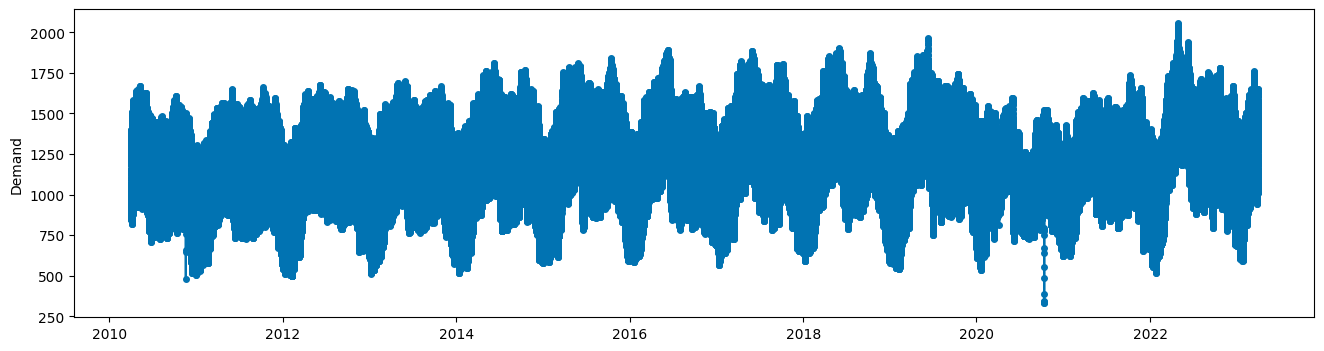

In [10]:
from sktime.utils.plotting import plot_series
plot_series(train_df)

**Test Data**

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Demand'>)

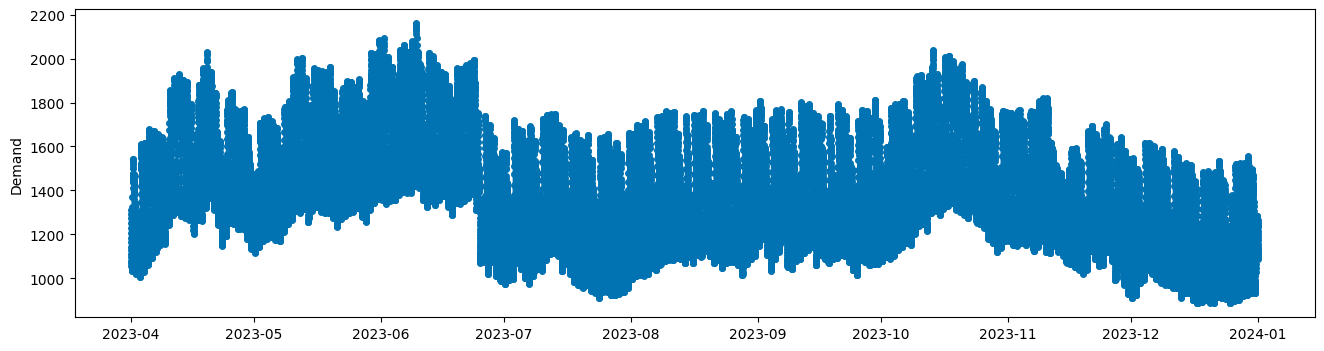

In [11]:
from sktime.utils.plotting import plot_series
plot_series(test_df)

# Prophet (Without Exo Variables)

In [ ]:
prophet_train_df = train_df.copy()
prophet_test_df = test_df.copy()

In [ ]:
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.base import ForecastingHorizon
import numpy as np

fh = ForecastingHorizon([i for i in range(1, len(prophet_test_df) +1)], is_relative=True)
forecaster = Prophet(yearly_seasonality = True,
                      add_country_holidays={'country_name': 'India'})
forecaster.fit(prophet_train_df['Demand'].astype(np.float32))

# Generate predictions
prophet_test_df['Predictions'] = forecaster.predict(fh)

/usr/local/lib/python3.10/dist-packages/holidays/countries/india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_oqvqrmn/yrd06plw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_oqvqrmn/tx6hnj2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88120', 'data', 'file=/tmp/tmp_oqvqrmn/yrd06plw.json', 'init=/tmp/tmp_oqvqrmn/tx6hnj2v.json', 'output', 'file=/tmp/tmp_oqvqrmn/prophet_modellwufp3yk/prophet_model-20250112141516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error: 0.06583993658959243
Median Absolute Percentage Error: 0.05353801040893419


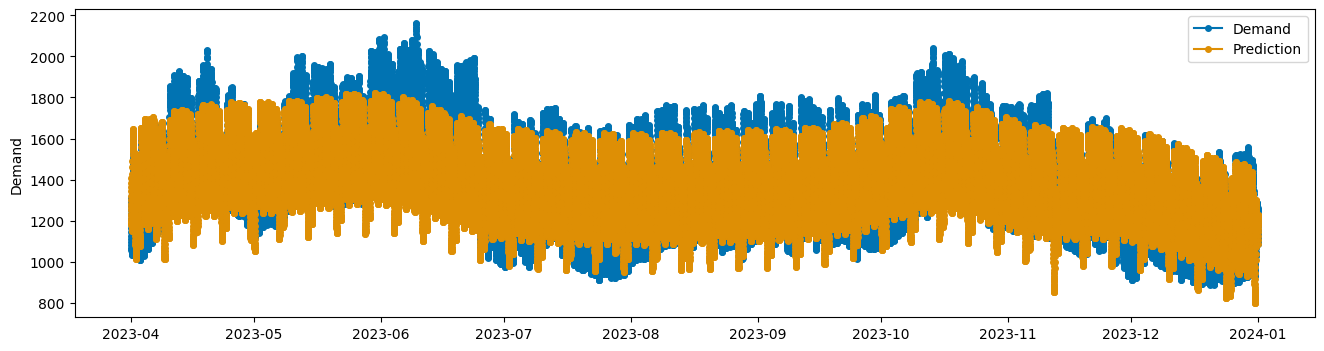

In [ ]:
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import median_absolute_percentage_error, mean_absolute_percentage_error

# Plotting the actual Demand and Predicted Demand for each day.
plot_series(prophet_test_df['Demand'],prophet_test_df['Predictions'], labels=["Demand", "Prediction"])

# Caluculating the MAE
median_absolute_percentage_error = median_absolute_percentage_error(prophet_test_df['Demand'], prophet_test_df['Predictions'])
mean_absolute_percentage_error = mean_absolute_percentage_error(prophet_test_df['Demand'], prophet_test_df['Predictions'])
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error}")
print(f"Median Absolute Percentage Error: {median_absolute_percentage_error}")

# Prophet (With Exo Variables)

In [12]:
prophet_train_df = pd.concat([train_df, ex_train_df], axis=1)
prophet_test_df = pd.concat([test_df, ex_test_df], axis=1)

In [13]:
from prophet import Prophet

model = Prophet()
model.add_country_holidays(country_name='India')
model.add_regressor('Temp')
model.add_regressor('Humidity')
prophet_train_df.reset_index(inplace=True)
prophet_train_df.columns = ['ds', 'y', 'Temp', 'Humidity']
model.fit(prophet_train_df)


/home/milanroy/Desktop/AEML/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
/home/milanroy/Desktop/AEML/.venv/lib/python3.10/site-packages/holidays/countries/india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
17:08:09 - cmdstanpy - INFO - Chain [1] start processing
17:15:14 - cmdstanpy - INFO - Chain [1] done processing


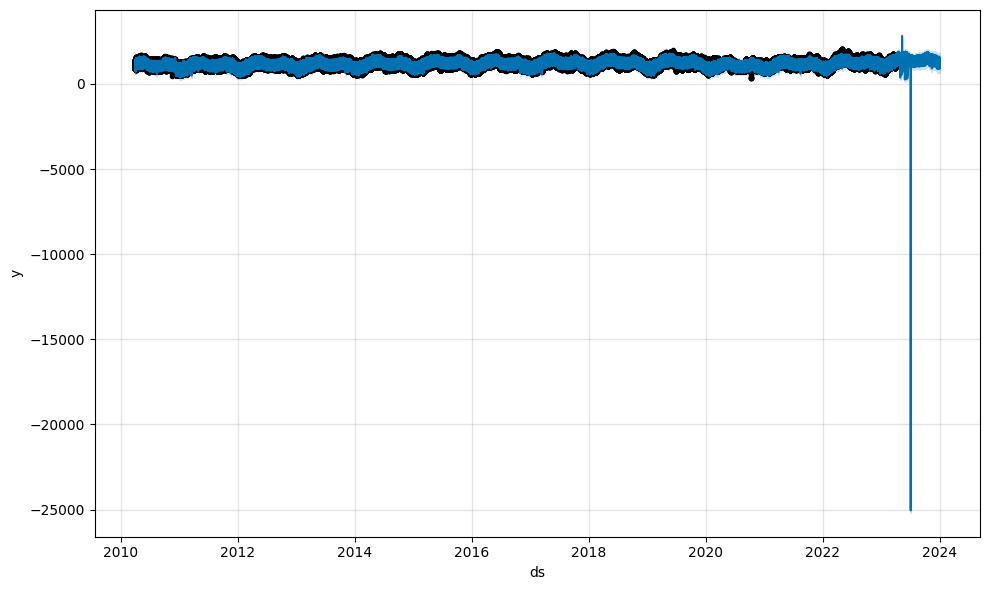

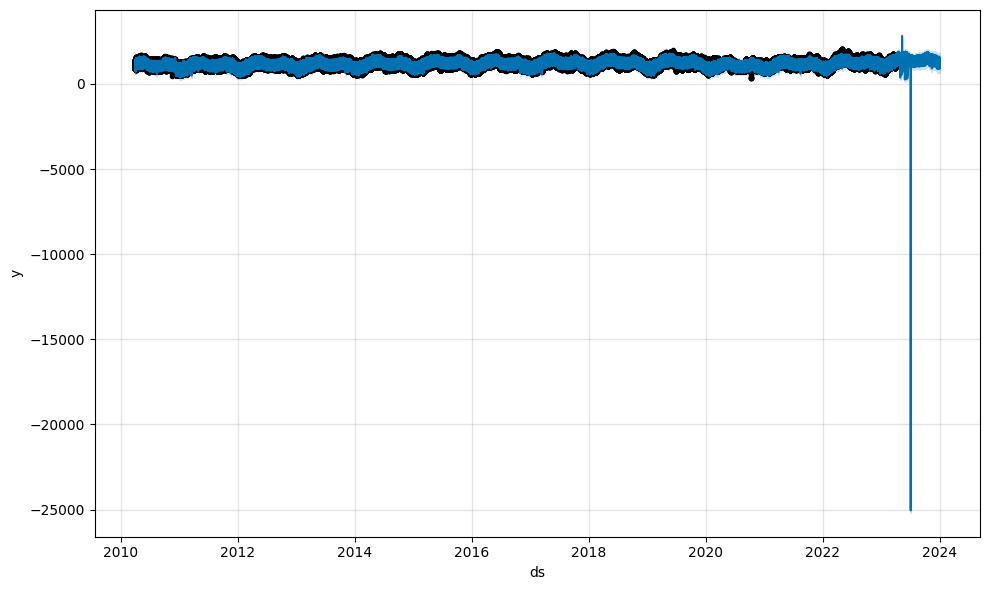

In [14]:
# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=len(prophet_test_df), freq='15min')

future['Temp'] = list(prophet_train_df['Temp']) + list(prophet_test_df.iloc[:275*96]['Temp'])  # Provide future values
future['Humidity'] = prophet_train_df['Humidity'].to_list() +  prophet_test_df.iloc[:275*96]['Humidity'].to_list()  # Provide future values

# Make predictions
forecast = model.predict(future )
# Plot the forecast
model.plot(forecast)

In [15]:
from sklearn.metrics import mean_absolute_error
from sktime.performance_metrics.forecasting import median_absolute_percentage_error, mean_absolute_percentage_error

test_predictions = forecast.iloc[-275*96:]['yhat']
prophet_test_df = prophet_test_df.iloc[:275*96]['Demand']

# Calculate MAE
mae = mean_absolute_percentage_error(prophet_test_df, test_predictions)
median_absolute_percentage_error = median_absolute_percentage_error(prophet_test_df, test_predictions)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Median Absolute Percentage Error: {median_absolute_percentage_error}")

Mean Absolute Error (MAE): 0.06583927031925102
Median Absolute Percentage Error: 0.05126753544458033
